<a href="https://colab.research.google.com/github/Bbat54/Bbat54/blob/main/IntroToKeras1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classifying Penguins with Keras

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn import preprocessing

penguins = pd.read_csv("/content/sample_data/penguins_size.csv")
penguins = penguins.sample(frac = 1)
penguins

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
278,Gentoo,Biscoe,43.2,14.5,208.0,4450.0,FEMALE
197,Chinstrap,Dream,50.8,18.5,201.0,4450.0,MALE
200,Chinstrap,Dream,51.5,18.7,187.0,3250.0,MALE
36,Adelie,Dream,38.8,20.0,190.0,3950.0,MALE
49,Adelie,Dream,42.3,21.2,191.0,4150.0,MALE
...,...,...,...,...,...,...,...
333,Gentoo,Biscoe,51.5,16.3,230.0,5500.0,MALE
254,Gentoo,Biscoe,49.1,14.8,220.0,5150.0,FEMALE
86,Adelie,Dream,36.3,19.5,190.0,3800.0,MALE
172,Chinstrap,Dream,42.4,17.3,181.0,3600.0,FEMALE


In [ ]:
penguins_x = pd.concat([penguins[['body_mass_g', 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm']], pd.get_dummies(penguins['sex'])], axis = 1)
penguins_x = penguins_x[['body_mass_g', 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'FEMALE', 'MALE']]
penguins_x


,body_mass_g,culmen_length_mm,culmen_depth_mm,flipper_length_mm,FEMALE,MALE
278,4450.0,43.2,14.5,208.0,1,0
197,4450.0,50.8,18.5,201.0,0,1
200,3250.0,51.5,18.7,187.0,0,1
36,3950.0,38.8,20.0,190.0,0,1
49,4150.0,42.3,21.2,191.0,0,1
...,...,...,...,...,...,...
333,5500.0,51.5,16.3,230.0,0,1
254,5150.0,49.1,14.8,220.0,1,0
86,3800.0,36.3,19.5,190.0,0,1
172,3600.0,42.4,17.3,181.0,1,0


In [ ]:
x = penguins_x.values
min_max_scaler = preprocessing.MinMaxScaler()
scaled_penguins_x = pd.DataFrame(min_max_scaler.fit_transform(x), columns=penguins_x.columns)
scaled_penguins_x

,body_mass_g,culmen_length_mm,culmen_depth_mm,flipper_length_mm,FEMALE,MALE
0,0.326389,0.338182,0.642857,0.508475,0.0,1.0
1,0.555556,0.520000,0.226190,0.745763,1.0,0.0
2,0.381944,0.385455,0.619048,0.406780,0.0,1.0
3,0.298611,0.658182,0.666667,0.440678,1.0,0.0
4,0.347222,0.221818,0.595238,0.220339,0.0,1.0
...,...,...,...,...,...,...
339,0.375000,0.360000,0.761905,0.474576,0.0,1.0
340,0.333333,0.327273,0.523810,0.305085,0.0,1.0
341,0.534722,0.592727,0.154762,0.525424,1.0,0.0
342,0.131944,0.218182,0.464286,0.152542,1.0,0.0


In [ ]:
penguins_y = penguins['species']
print(penguins_y)
penguins_y = penguins_y.astype('category').cat.codes.to_numpy()
penguins_y

123       Adelie
294       Gentoo
115       Adelie
219    Chinstrap
23        Adelie
         ...    
53        Adelie
135       Adelie
318       Gentoo
108       Adelie
298       Gentoo
Name: species, Length: 344, dtype: object


array([0, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 0, 1,
       0, 0, 1, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 0, 2, 0, 0, 0, 1, 2, 2, 1,
       2, 1, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 1, 1, 0, 2, 1, 2, 2,
       1, 2, 2, 0, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0,
       0, 2, 1, 2, 0, 2, 0, 0, 2, 0, 2, 1, 2, 0, 0, 2, 2, 1, 0, 1, 1, 2,
       0, 2, 2, 1, 0, 1, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 1, 0, 0, 2, 2, 1,
       1, 0, 2, 0, 0, 0, 2, 2, 1, 0, 1, 1, 1, 1, 2, 1, 2, 0, 2, 0, 1, 0,
       1, 0, 0, 0, 2, 2, 2, 1, 1, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 1,
       2, 1, 0, 2, 0, 2, 0, 2, 0, 1, 2, 0, 0, 0, 1, 0, 2, 0, 0, 2, 0, 2,
       2, 1, 0, 2, 0, 2, 1, 2, 2, 0, 0, 2, 2, 1, 0, 2, 1, 0, 1, 0, 1, 0,
       0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0, 2, 0, 1, 0, 2, 2, 2, 2,
       0, 0, 2, 1, 2, 1, 2, 0, 1, 0, 1, 0, 1, 2, 2, 1, 0, 2, 0, 2, 2, 1,
       2, 1, 0, 2, 2, 0, 2, 0, 2, 1, 0, 0, 0, 0, 1, 2, 2, 2, 2, 0, 2, 0,
       2, 0, 0, 2, 0, 0, 2, 2, 0, 1, 0, 0, 0, 0, 0,

In [ ]:
inputs = keras.Input(shape=(6,))
x = layers.Dense(50, activation = 'relu')(inputs)
outputs = layers.Dense(3, activation='sigmoid')(x)
model = keras.Model(inputs=inputs, outputs=outputs, name="penguin_model")

In [ ]:
model.summary()

Model: "penguin_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 6)]               0         
                                                                 
 dense (Dense)               (None, 4)                 28        
                                                                 
 dense_1 (Dense)             (None, 3)                 15        
                                                                 
Total params: 43
Trainable params: 43
Non-trainable params: 0
_________________________________________________________________


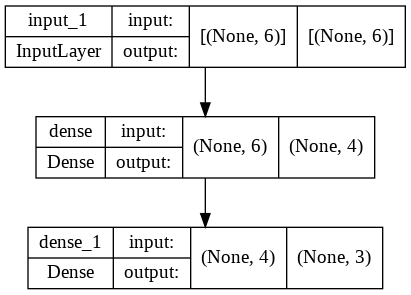

In [ ]:
keras.utils.plot_model(model, show_shapes = True)

In [ ]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

history = model.fit(penguins_x, penguins_y, batch_size = 64, epochs=10, validation_split=0.1)

scores = model.evaluate(penguins_x, penguins_y, verbose=2)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


5/5 [==============================] - 1s 52ms/step - loss: nan - accuracy: 0.4304 - val_loss: nan - val_accuracy: 0.4286
Epoch 2/10
5/5 [==============================] - 0s 13ms/step - loss: nan - accuracy: 0.4434 - val_loss: nan - val_accuracy: 0.4286
Epoch 3/10
1/5 [=====>........................] - ETA: 0s - loss: nan - accuracy: 0.3438

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


5/5 [==============================] - 0s 12ms/step - loss: nan - accuracy: 0.4434 - val_loss: nan - val_accuracy: 0.4286
Epoch 4/10
5/5 [==============================] - 0s 11ms/step - loss: nan - accuracy: 0.4434 - val_loss: nan - val_accuracy: 0.4286
Epoch 5/10
5/5 [==============================] - 0s 12ms/step - loss: nan - accuracy: 0.4434 - val_loss: nan - val_accuracy: 0.4286
Epoch 6/10
5/5 [==============================] - 0s 13ms/step - loss: nan - accuracy: 0.4434 - val_loss: nan - val_accuracy: 0.4286
Epoch 7/10
5/5 [==============================] - 0s 14ms/step - loss: nan - accuracy: 0.4434 - val_loss: nan - val_accuracy: 0.4286
Epoch 8/10
5/5 [==============================] - 0s 13ms/step - loss: nan - accuracy: 0.4434 - val_loss: nan - val_accuracy: 0.4286
Epoch 9/10
5/5 [==============================] - 0s 13ms/step - loss: nan - accuracy: 0.4434 - val_loss: nan - val_accuracy: 0.4286
Epoch 10/10
5/5 [==============================] - 0s 11ms/step - loss: nan - ac

In [ ]:
model_scaled = keras.Model(inputs=inputs, outputs=outputs, name="penguin_model_scaled")

model_scaled.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

history_scaled = model_scaled.fit(scaled_penguins_x, penguins_y, batch_size = 64, epochs = 10, validation_split = 0.1)

scores = model_scaled.evaluate(scaled_penguins_x, penguins_y, verbose = 2)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


5/5 [==============================] - 1s 53ms/step - loss: nan - accuracy: 0.4434 - val_loss: nan - val_accuracy: 0.4286
Epoch 2/10
5/5 [==============================] - 0s 11ms/step - loss: nan - accuracy: 0.4434 - val_loss: nan - val_accuracy: 0.4286
Epoch 3/10
1/5 [=====>........................] - ETA: 0s - loss: nan - accuracy: 0.3750

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


5/5 [==============================] - 0s 12ms/step - loss: nan - accuracy: 0.4434 - val_loss: nan - val_accuracy: 0.4286
Epoch 4/10
5/5 [==============================] - 0s 10ms/step - loss: nan - accuracy: 0.4434 - val_loss: nan - val_accuracy: 0.4286
Epoch 5/10
5/5 [==============================] - 0s 9ms/step - loss: nan - accuracy: 0.4434 - val_loss: nan - val_accuracy: 0.4286
Epoch 6/10
5/5 [==============================] - 0s 9ms/step - loss: nan - accuracy: 0.4434 - val_loss: nan - val_accuracy: 0.4286
Epoch 7/10
5/5 [==============================] - 0s 9ms/step - loss: nan - accuracy: 0.4434 - val_loss: nan - val_accuracy: 0.4286
Epoch 8/10
5/5 [==============================] - 0s 10ms/step - loss: nan - accuracy: 0.4434 - val_loss: nan - val_accuracy: 0.4286
Epoch 9/10
5/5 [==============================] - 0s 9ms/step - loss: nan - accuracy: 0.4434 - val_loss: nan - val_accuracy: 0.4286
Epoch 10/10
5/5 [==============================] - 0s 9ms/step - loss: nan - accurac